## Red Wine Quality Prediction

In [41]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [27]:
# Importing the wine quality dataset

data = pd.read_csv("winequality-red.csv", sep=';')

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
print(data.shape)
data.info()

(1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**It looks like there are no null values so we are good to go.**

In [9]:
# Get the description of the data
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Exploratory Analysis 
##### Histograms for different features

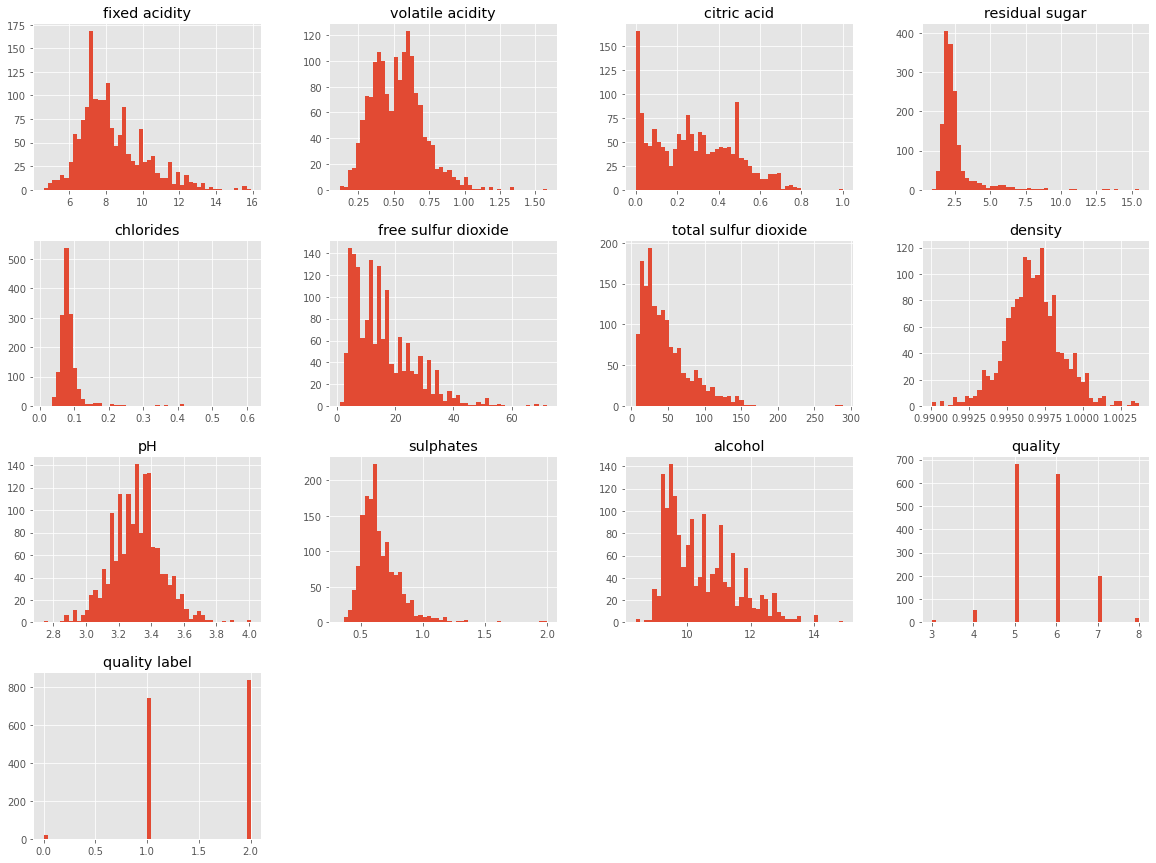

In [34]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

mpl.style.use('ggplot')

data.hist(bins=50, figsize=(20, 15))
plt.show()

In [3]:
#data.iloc[:, : -2].array()#.plot()

##### Heatmap - Correlation between features and the label

<AxesSubplot:>

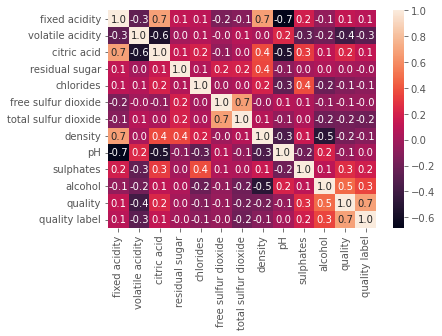

In [35]:
# Checking the correlation between features and the label
sns.heatmap(data.corr(), annot=True, fmt = ".1f")


In [36]:
data['quality label'] = data['quality'].apply(lambda x: 'low' if x<=5 else 'medium' if x<=7 else 'high')

In [37]:
data[['quality', 'quality label']].value_counts()

quality  quality label
5        low              681
6        medium           638
7        medium           199
4        low               53
8        high              18
3        low               10
dtype: int64

In [38]:
encoder = LabelEncoder()
data['quality label'] = encoder.fit_transform(data['quality label'])

X = data.drop(['quality'], axis=1)
y = data['quality']
              
X_scaler = StandardScaler()
X = pd.DataFrame(X_scaler.fit_transform(X), columns=X.columns)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality label
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.981430
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.981430
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.981430
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.934696
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.981430


### Preparing the data training

In [30]:
# Splitting the dataset into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=0)

In [31]:


logist_reg.fit(X_train, y_train)
y_ = logist_reg.predict(X_test)


In [32]:
f1_score(y_test, y_ , average="weighted")

0.810829729057917

### Training Classifiers

In [42]:
tree_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier()
rand_forest = RandomForestClassifier()
logist_reg = LogisticRegression(max_iter=200)
classifiers = [tree_classifier, knn_classifier, rand_forest, logist_reg]

f1_scores = []
acc_scores = []
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    yp = classifier.predict(X_test)
    f1_ = f1_score(y_test, yp , average="weighted")*100
    f1_scores.append(f1_)
    acc = accuracy_score(y_test, yp)*100
    acc_scores.append(acc)


In [43]:
# Model Evaluation Table
clfs = ['Decision Tree', 'K Neighbors', 'Random Forest', 'Logistic Regression']
cls = pd.DataFrame({"F1 Score": f1_scores, "Accuracy Score": acc_scores}, index = clfs)
cls

,F1 Score,Accuracy Score
Decision Tree,80.554838,81.25
K Neighbors,82.507567,83.75
Random Forest,85.355392,87.50
Logistic Regression,81.082973,83.75


### Plotting the scores of classifiers

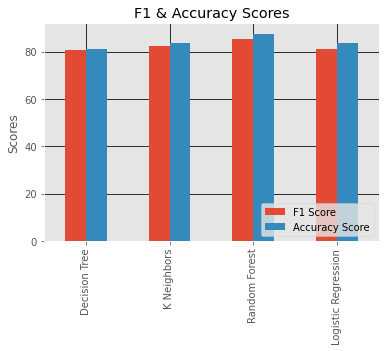

In [44]:
#cls[['Accuracy Score', "F1 Score"]].plot(kind='bar')
cls.plot(kind='bar')
plt.title("F1 & Accuracy Scores")
plt.grid(color='black')
#plt.xlabel("F1 Score")
plt.ylabel("Scores")
plt.legend(loc='lower right')
plt.show()

### Conclusions

From the F1 Score and Accuracy Score table above we can see that the Random Forest Classifier performs slightly better that other classifiers with the F1 score of 86% and the accuracy score of 88%.